In [1]:
%load_ext autoreload
%autoreload 2

import hubmapbags
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import seaborn as sns
import numpy as np

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
+-----------------------------+
| Getting list of assay types |
+-----------------------------+
Getting list of dataset IDs


100%|██████████| 58/58 [00:10<00:00,  5.60it/s]

+--------------------+
| Getting group name |
+--------------------+


+-------------------+
| Getting data type |
+-------------------+


+------------------+
| Get dataset type |
+------------------+


+----------------------------+
| Getting creation timestamp |
+----------------------------+


+-----------------------------+
| Getting published timestamp |
+-----------------------------+


+--------------------------+
| Getting protected status |
+--------------------------+


Sorting dataframe
Backing up plot to /hive/hubmap/bdbags/reports/group-20230804.png
[Errno 13] Permission denied: '/hive/hubmap/bdbags/reports/group-20230804.png'
Unable to save plot to /hive/hubmap/bdbags/reports/group-20230804.png.


<Figure size 3000x3500 with 0 Axes>

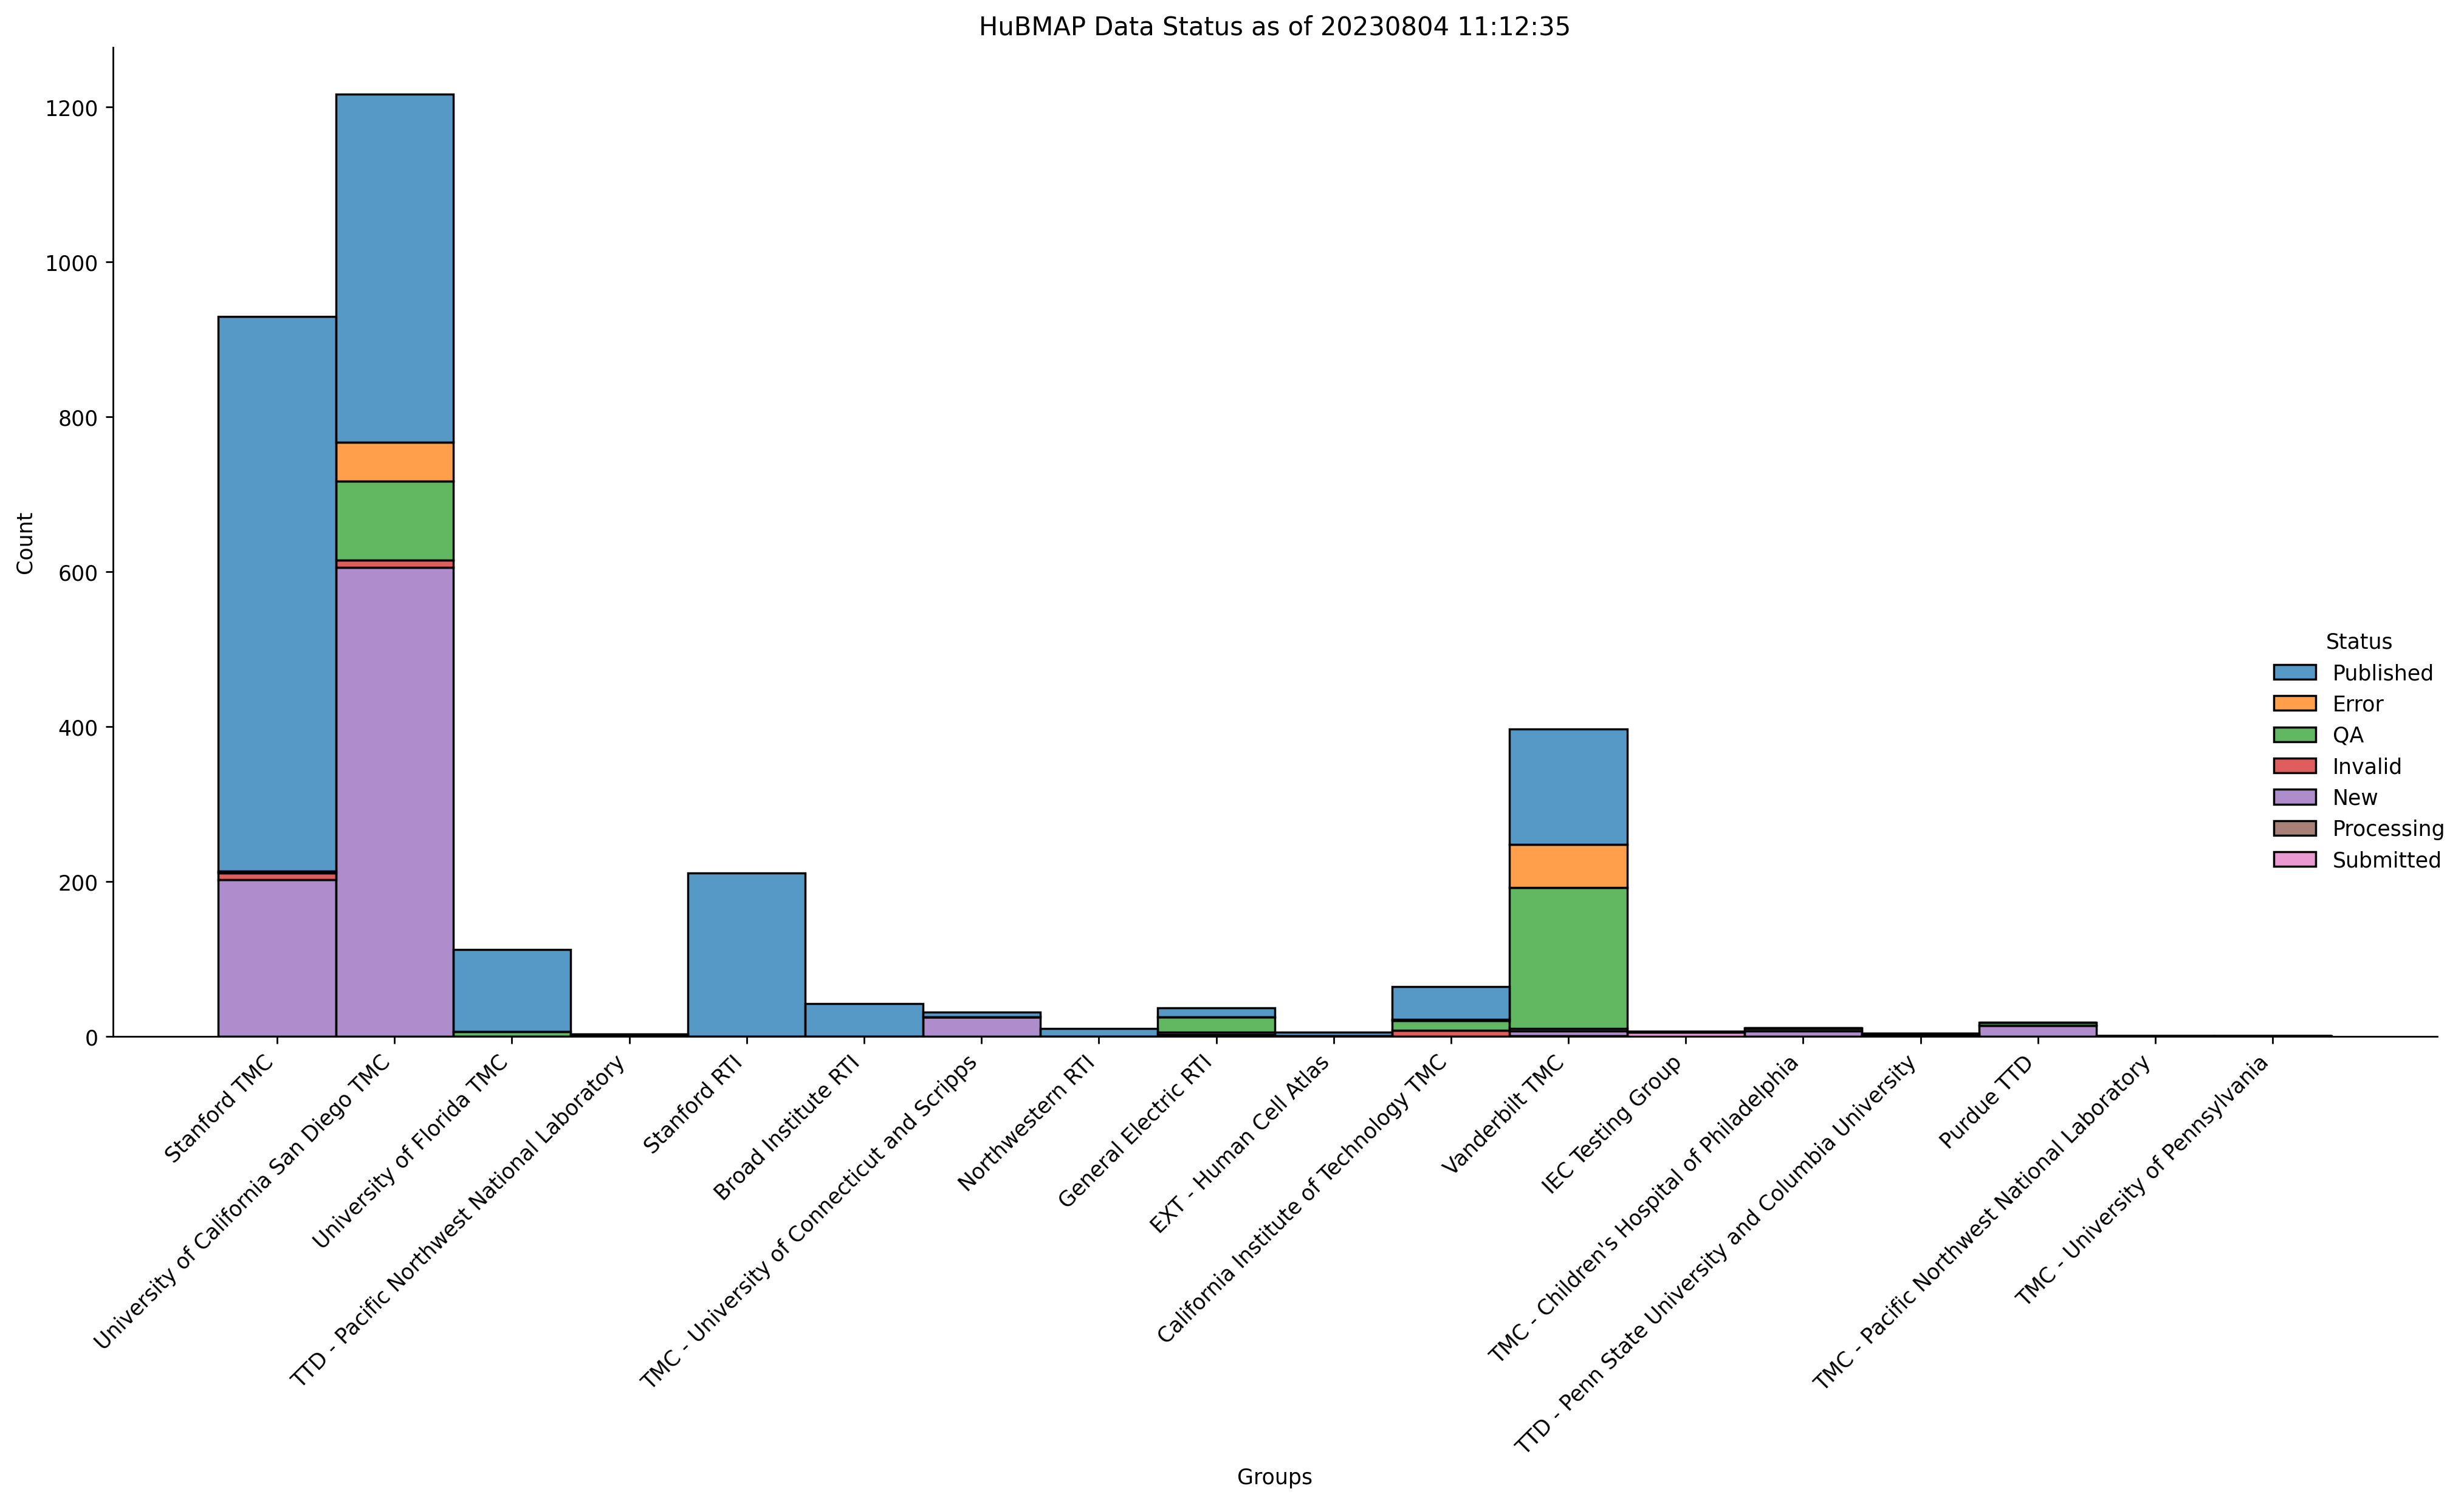

,uuid,hubmap_id,status,group_name,data_type,dataset_type,created_datetime,published_datetime,is_protected
4878,5c81739be1de46b024ea6e513eac91bb,HBM425.NWSM.627,Published,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-05-26 00:00:46.337,2023-08-02 09:15:38.600,False
4919,6039edc6b019fb0974af0af7a25a4fb8,HBM329.SNLX.887,Published,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-06-26 09:02:28.724,2023-08-02 09:15:36.915,False
4857,9e2b9df20dcfe25e3bd0f1e2ff17a1a4,HBM222.QQZL.292,Published,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-05-25 19:21:48.589,2023-08-02 09:15:35.192,False
4873,2bc85fe4d464f504523c988316a9a97b,HBM494.VFWC.974,Published,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-06-26 09:02:10.667,2023-08-02 09:15:33.576,False
4955,be0e16b0080ca4df92f83bebb3a76ff3,HBM769.MJBW.855,Published,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-05-25 15:27:48.263,2023-08-02 09:15:32.073,False
...,...,...,...,...,...,...,...,...,...
4937,9375f0d750c63943c522201ec4c9c555,HBM676.CFVN.729,Error,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-05-25 12:11:57.647,NaT,False
4938,49fd746d27b9dc04a19fea5ff989e03d,HBM996.JJJW.865,Error,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-02-01 12:05:42.632,NaT,False
4939,5211a4e4370d3f306af8ce55aec3247b,HBM586.NLHS.577,Error,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-02-01 12:04:26.670,NaT,False
4941,94df8b614ad665975cc056f9c0938c34,HBM562.GQXP.239,Error,Stanford TMC,[sn_atac_seq_multiome_10x],Derived,2023-02-01 12:06:30.935,NaT,False


In [2]:
token = 'TOKEN'
hubmapbags.utilities.clean()
hubmapbags.reports.daily(token=token)

In [3]:
#get daily report
report_output_directory = "daily-report"
if not Path(report_output_directory).exists():
    Path(report_output_directory).mkdir()

now = datetime.now()
report_output_filename = f'{report_output_directory}/{str(now.strftime("%Y%m%d"))}.tsv'
print(report_output_filename)

df = pd.read_csv(report_output_filename, sep="\t")

daily-report/20230804.tsv


In [4]:
#dataframe keys
df.keys()

Index(['uuid', 'hubmap_id', 'status', 'group_name', 'data_type',
       'dataset_type', 'created_datetime', 'published_datetime',
       'is_protected'],
      dtype='object')

# Plots by Group Name

In [5]:
df['group_name'].unique()

array(['Stanford TMC', 'IEC Testing Group',
       'Washington University Kidney TMC', 'General Electric RTI',
       'MC - IU', 'Stanford RTI',
       'University of California San Diego TMC',
       'California Institute of Technology TMC',
       'University of Florida TMC',
       'TTD - Pacific Northwest National Laboratory',
       'Broad Institute RTI',
       'TMC - University of Connecticut and Scripps', 'Northwestern RTI',
       'EXT - Human Cell Atlas', 'Vanderbilt TMC',
       "TMC - Children's Hospital of Philadelphia",
       'TTD - Penn State University and Columbia University',
       'TMC - Pacific Northwest National Laboratory', 'Purdue TTD',
       'TMC - University of Pennsylvania'], dtype=object)

In [6]:
group = df.groupby(['group_name', 'status']).count()[['data_type']]
print(group.to_markdown())

|                                                                       |   data_type |
|:----------------------------------------------------------------------|------------:|
| ('Broad Institute RTI', 'Published')                                  |         112 |
| ('Broad Institute RTI', 'QA')                                         |          43 |
| ('California Institute of Technology TMC', 'Error')                   |          24 |
| ('California Institute of Technology TMC', 'Invalid')                 |           8 |
| ('California Institute of Technology TMC', 'Processing')              |           2 |
| ('California Institute of Technology TMC', 'Published')               |         108 |
| ('California Institute of Technology TMC', 'QA')                      |          22 |
| ('EXT - Human Cell Atlas', 'Published')                               |           8 |
| ('EXT - Human Cell Atlas', 'QA')                                      |           3 |
| ('General Electric RTI', 'Erro

Backing up plot to /hive/hubmap/bdbags/reports/group-20230804.png
[Errno 13] Permission denied: '/hive/hubmap/bdbags/reports/group-20230804.png'
Unable to save plot to /hive/hubmap/bdbags/reports/group-20230804.png.


<Figure size 7500x8750 with 0 Axes>

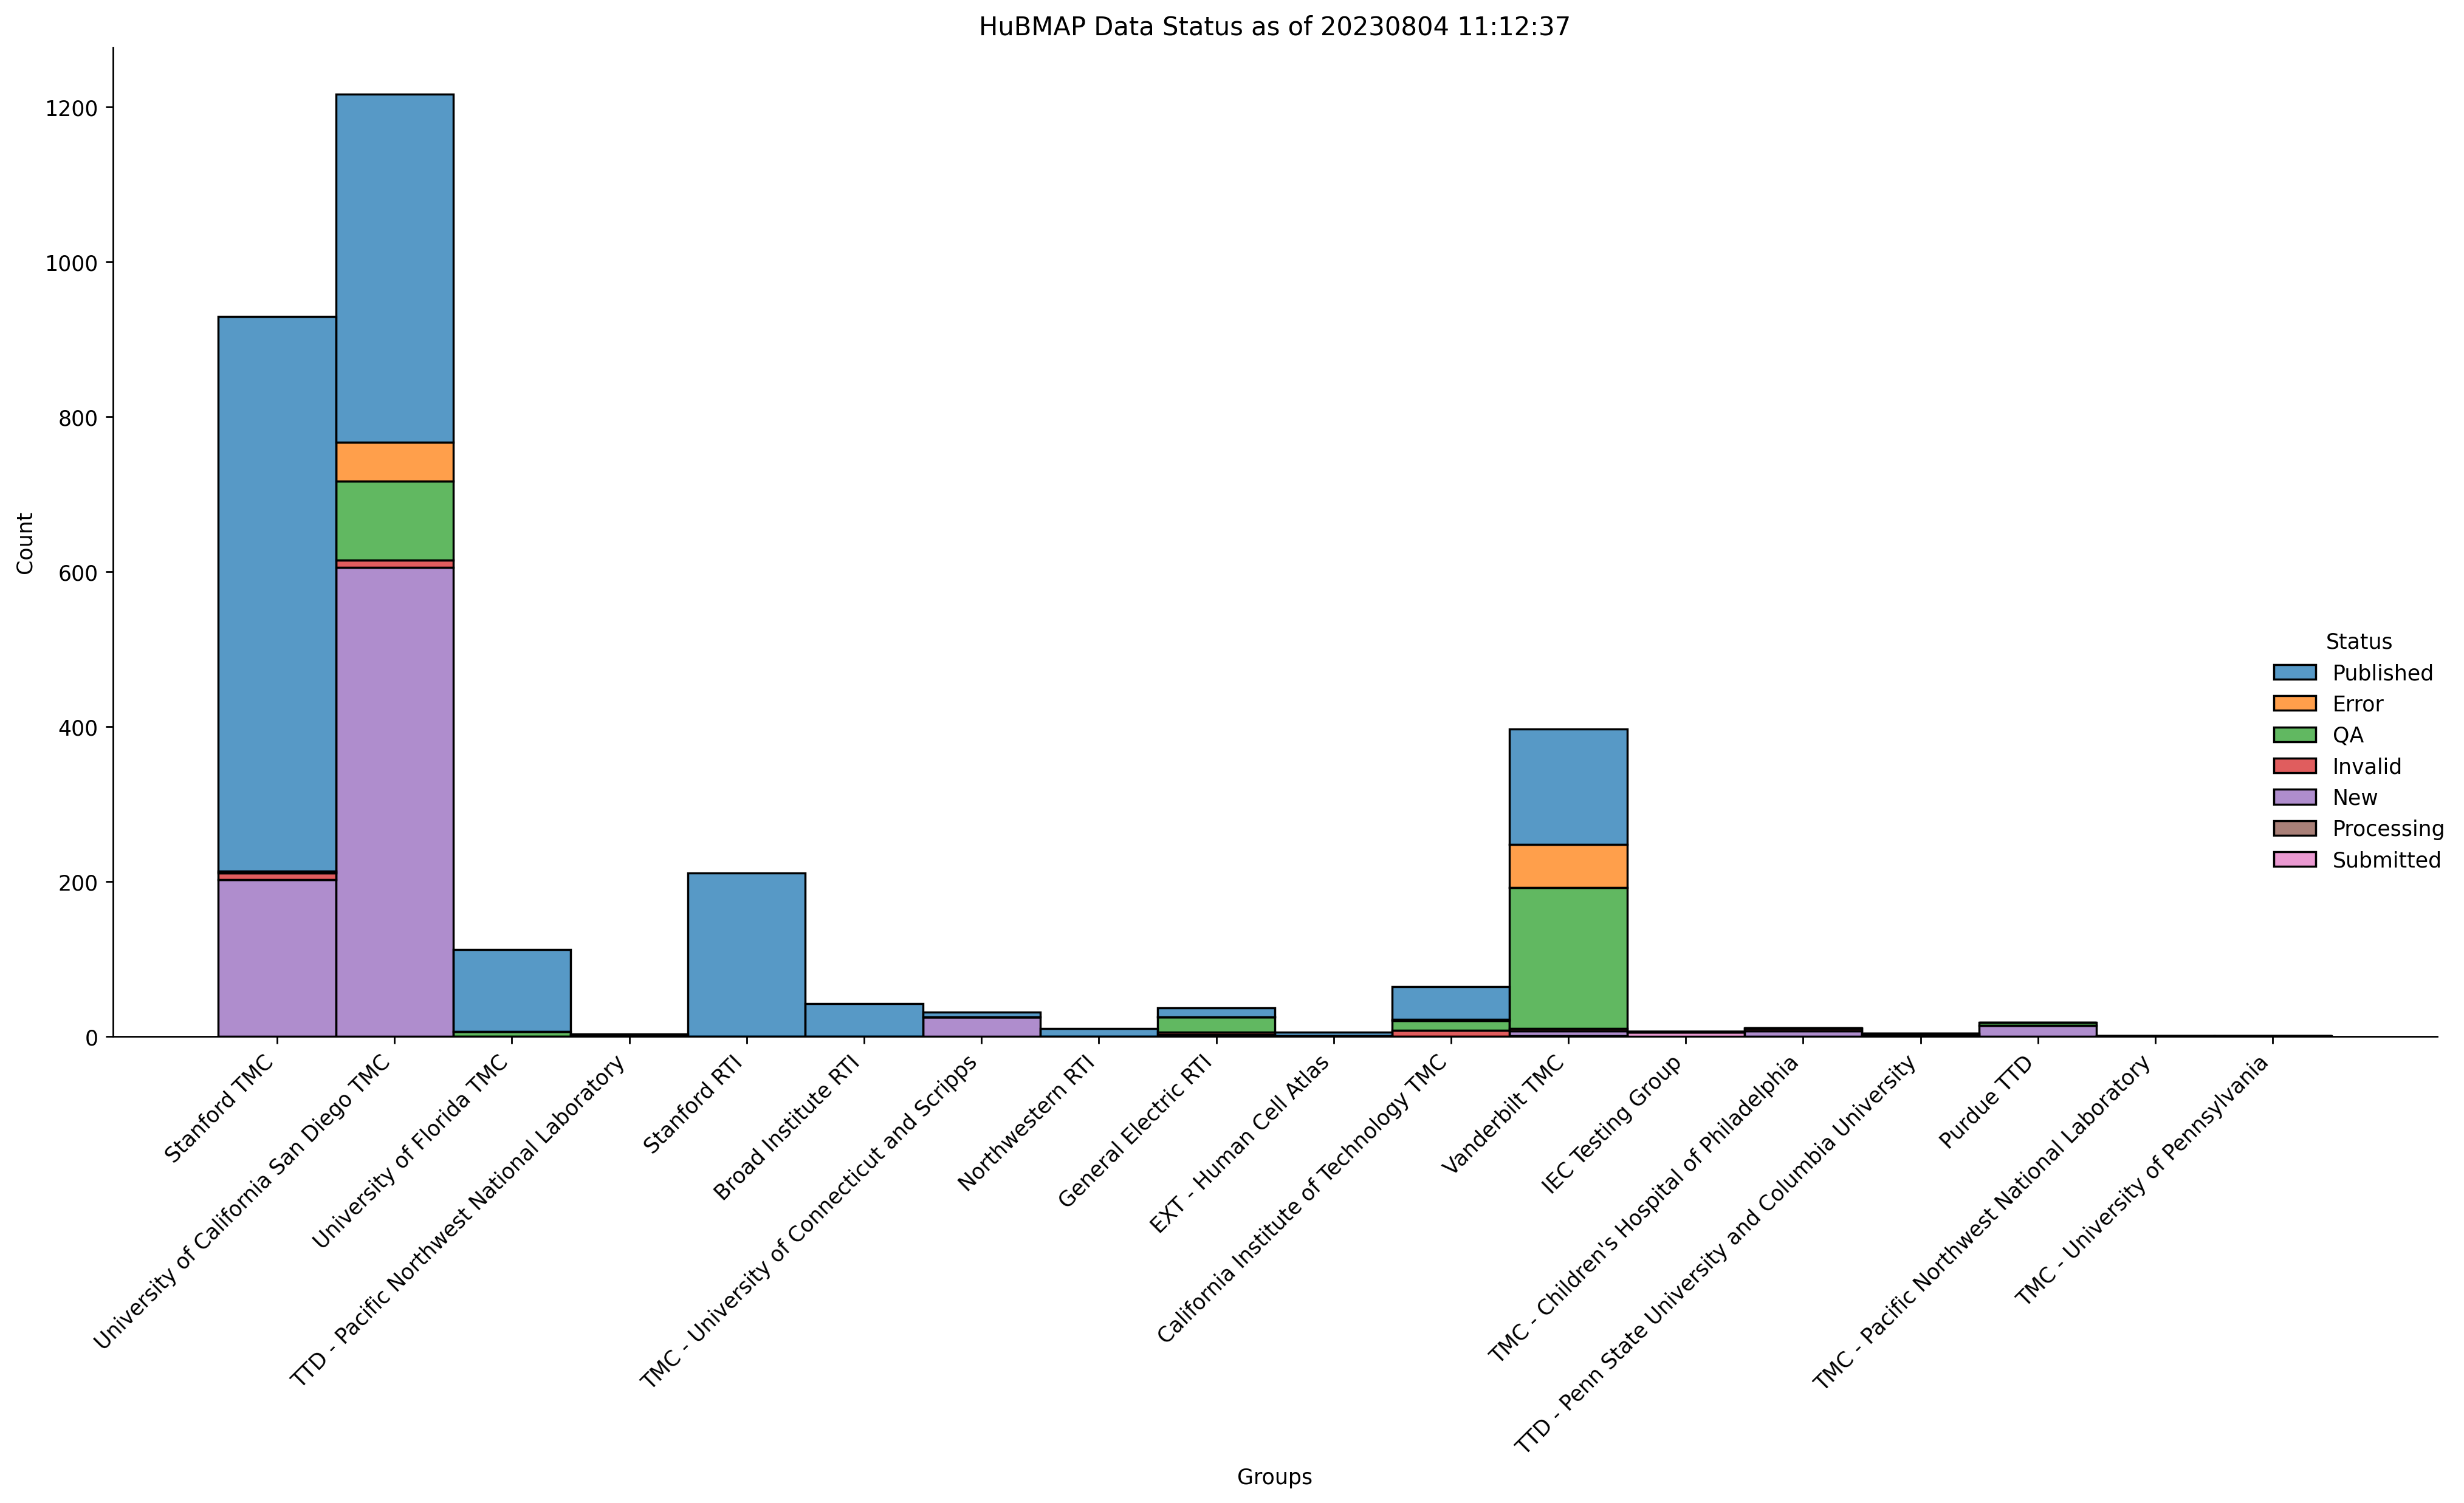

In [7]:
hubmapbags.plots.by_group(df)

# Plots by Data Type

In [8]:
df['data_type'].unique()

array(["['sn_atac_seq_multiome_10x']", "['publication_ancillary']",
       "['codex_cytokit']", "['CODEX']", "['MS']",
       "['salmon_sn_rnaseq_10x']", "['salmon_rnaseq_snareseq']",
       "['LC-MS']", "['snRNAseq-10xGenomics-v3']",
       "['salmon_rnaseq_sciseq']", "['snATACseq']",
       "['scRNAseq-10xGenomics-v3']", "['image_pyramid']",
       "['MALDI-IMS']", "['LC-MS_bottom_up']", "['MIBI']",
       "['salmon_rnaseq_slideseq']", "['Slide-seq']",
       "['salmon_rnaseq_10x']", "['LC-MS_top_down']",
       "['codex_cytokit_v1']", "['cell-dive']", "['snRNAseq']",
       "['scRNAseq-10xGenomics-v2']", "['sciRNAseq']", "['SNAREseq']",
       "['SNARE-RNAseq2']", "['WGS']", "['sc_atac_seq_snare']", "['PAS']",
       "['AF']", "['sc_atac_seq_sci']", "['sciATACseq']", "['IMC3D']",
       "['Lightsheet']", "['bulk_atacseq']", "['scRNA-Seq-10x']",
       "['image_pyramid', 'PAS']", "['image_pyramid', 'MALDI-IMS-pos']",
       "['sc_atac_seq_snare_lab']", "['sc_rna_seq_snare_lab']",
   

In [9]:
data_type = df.groupby(['data_type', 'status']).count()
data_type

uuid  hubmap_id  group_name  \
data_type                    status                                    
['AF']                       Error         56         56          56   
                             Invalid        4          4           4   
                             New            2          2           2   
                             Processing     1          1           1   
                             Published     33         33          33   
...                                       ...        ...         ...   
['sn_atac_seq_multiome_10x'] Error         44         44          44   
                             New            1          1           1   
                             Processing     3          3           3   
                             Published     65         65          65   
                             QA             6          6           6   

                                         dataset_type  created_datetime  \
data_type                    status                                       
['AF']                       Error                 56                56   
                             Invalid                4                 4   
                             New                    2                 2   
                             Processing             1                 1   
                             Published             33                33   
...                                               ...               ...   
['sn_atac_seq_multiome_10x'] Error                 44                44   
                             New                    1                 1   
                             Processing             3                 3   
                             Published             65                65   
                             QA                     6                 6   

                                         published_datetime  is_protected  
data_type                    status                                        
['AF']                       Error                        0            56  
                             Invalid                      0             4  
                             New                          0             2  
                             Processing                   0             1  
                             Published                   33            33  
...                                                     ...           ...  
['sn_atac_seq_multiome_10x'] Error                        0            44  
                             New                          0             1  
                             Processing                   0             3  
                             Published                   65            65  
                             QA                           0             6  

[142 rows x 7 columns]

In [10]:
df['status'].unique()

array(['Published', 'QA', 'Error', 'Invalid', 'New', 'Processing',
       'Submitted'], dtype=object)

Backing up plot to /hive/hubmap/bdbags/reports/data-type-20230804.png
[Errno 13] Permission denied: '/hive/hubmap/bdbags/reports/data-type-20230804.png'
Unable to save plot to /hive/hubmap/bdbags/reports/data-type-20230804.png.


<Figure size 7500x8750 with 0 Axes>

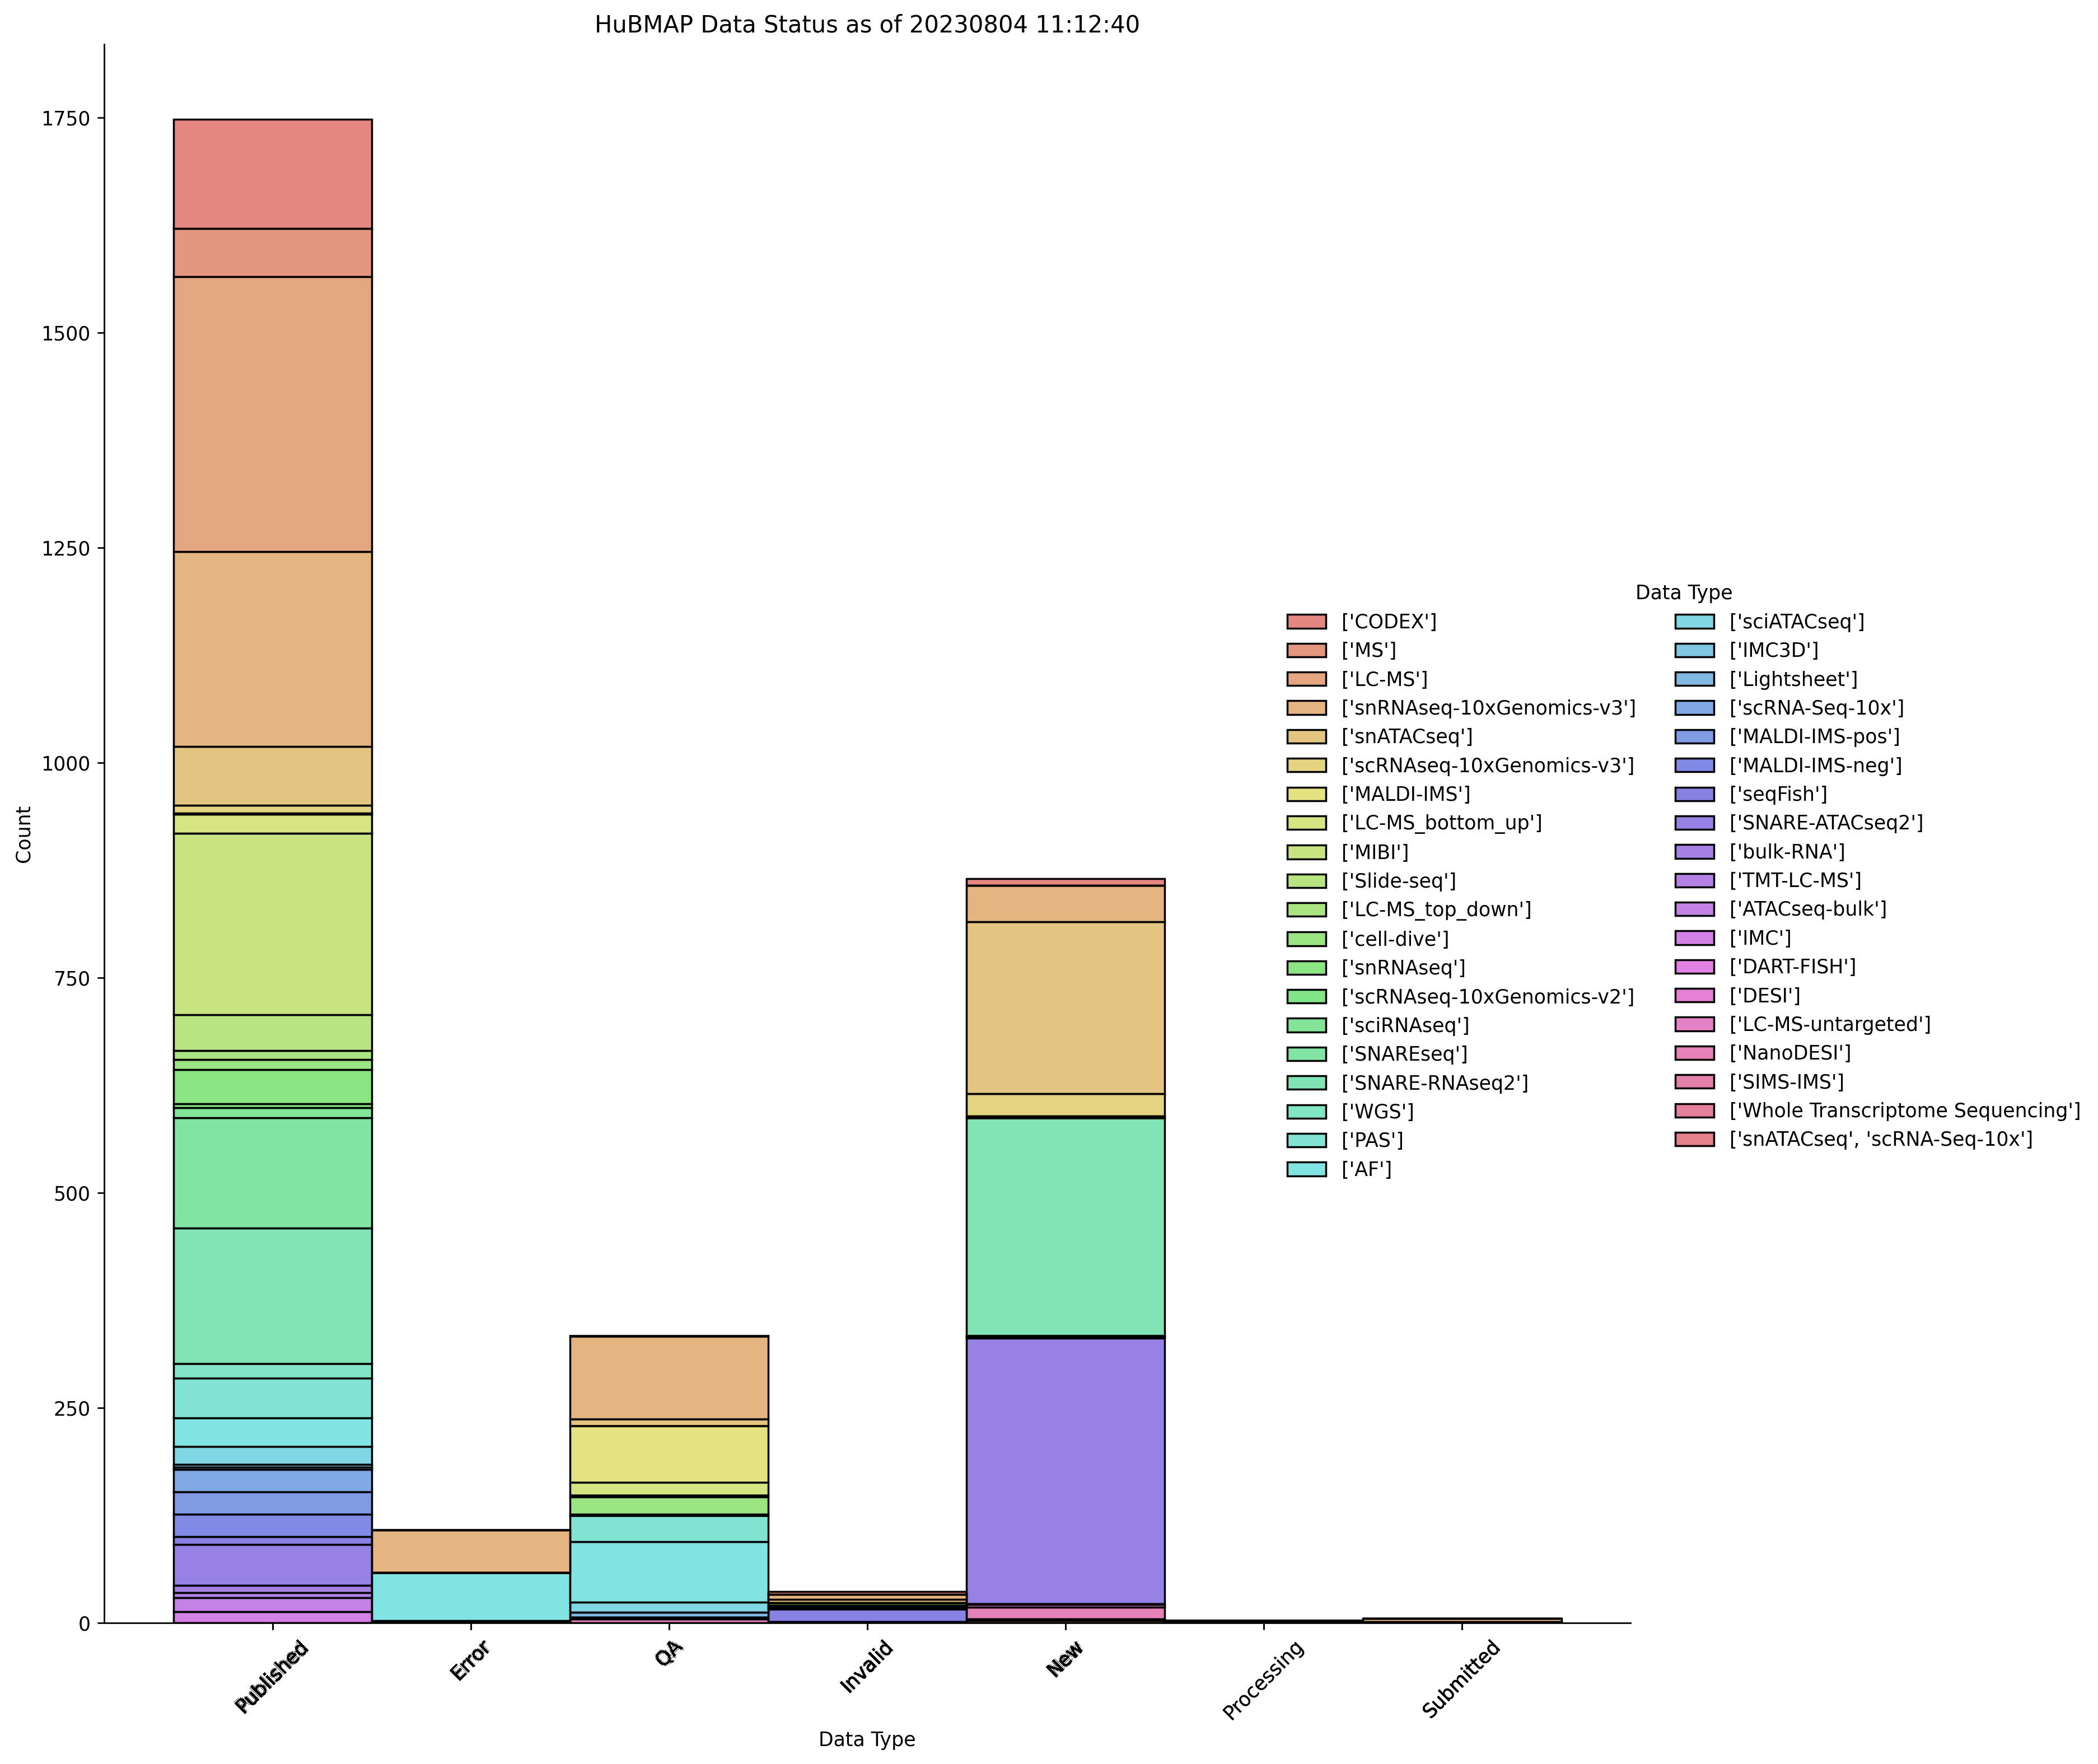

In [11]:
hubmapbags.plots.by_data_type(df)

# Plots by Date

In [12]:
hubmapbags.plots.by_date(df)

NotImplementedError: 

In [ ]:
install.packages('IRkernel')